## House Price Prediction using Linear, Ridge and Lasso Regression
A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation techniques.

The solution is divided into the following sections: 
- Data understanding 
- Data cleaning
- Data exploration
- Data preparation
- Model building and evaluation
- Observation

### 1. Data Understanding 

Let's first have a look at the dataset and understand the size, attribute names etc.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [71]:
# reading the dataset
house = pd.read_csv("train.csv")

In [72]:
# summary of the dataset: 1460 rows, 81 columns
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [73]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; Let's visualize them:

In [74]:
# Understanding the feature names in the dataset
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [75]:
# Getting insights of the features
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [76]:
# MSZoning:zoning classification of sale: 
# Mostly in Residential Low or medium density
house['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [77]:
# LotShape: General shape of property 
# Regular shape is more in demand as compared to irregular

house['LotShape'].astype('category').value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [78]:
# HouseStyle: Style of dwelling
# one story or 2 story is more in demand 
house['HouseStyle'].astype('category').value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

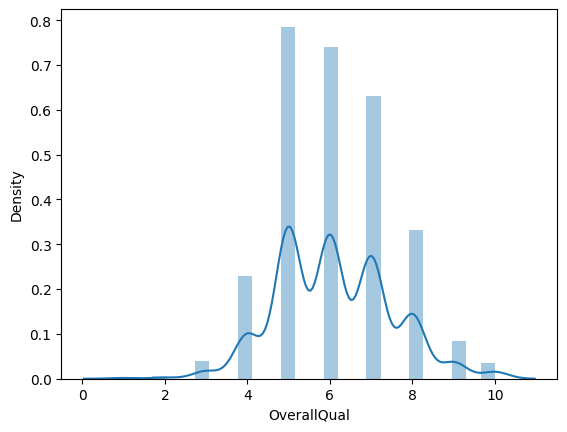

In [79]:
# OverallQual: Rates the overall material and finish of the house
sns.distplot(house['OverallQual'])
plt.show()

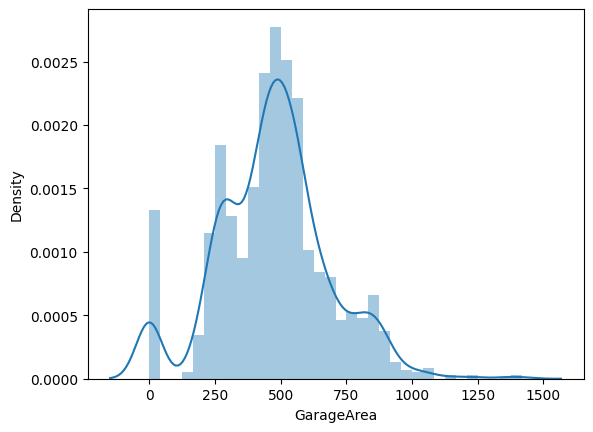

In [80]:
# GarageArea: Size of garage in square feet
sns.distplot(house['GarageArea'])
plt.show()

### 2. Data Cleaning

In [81]:
## Check if any duplicate rows present
duplicate_data = house[house.duplicated(['Id'])]
duplicate_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [82]:
## Fetch Empty columns
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

None of the row is completely null , none of the column is completely empty, so there is no need to drop any row or column

In [83]:
### Find the Columns where most values are null
missing_per = house.isnull().sum() * 100 / len(house)
missing_value_house = pd.DataFrame({'column': house.columns,'missing%':missing_per})
missing_value_house = missing_value_house[missing_value_house['missing%']>0]
missing_value_house.sort_values('missing%',inplace = True,ascending=False)
missing_value_house

,column,missing%
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageType,GarageType,5.547945
GarageYrBlt,GarageYrBlt,5.547945
GarageFinish,GarageFinish,5.547945
GarageQual,GarageQual,5.547945


In [84]:
### Drop the Columns where most values are null
house = house.drop(['PoolQC','MiscFeature','Alley'],axis=1)
house.shape

(1460, 78)

In [85]:
###Impute the categorial variable with 'None' value

categorial_null = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "Fence","Electrical"]
for i in categorial_null:
   house[i].fillna("none", inplace=True)

In [86]:
#Now checking the null again
missing_per_2 = house.isnull().sum() * 100 / len(house)
missing_value_house_2 = pd.DataFrame({'column': house.columns,'missing%':missing_per_2})
missing_value_house_2 = missing_value_house_2[missing_value_house_2['missing%']>0]
missing_value_house_2.sort_values('missing%',inplace = True,ascending=False)
missing_value_house_2

,column,missing%
LotFrontage,LotFrontage,17.739726
GarageYrBlt,GarageYrBlt,5.547945
MasVnrArea,MasVnrArea,0.547945


In [87]:
#Checking for numeric variable having null values for outliers
house[['LotFrontage','GarageYrBlt','MasVnrArea']].describe(percentiles=[.25, .50, .75, .95, .99])

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
95%,107.000000,2007.000000,456.000000
99%,141.000000,2009.000000,791.920000
max,313.000000,2010.000000,1600.000000


In [88]:
# It is obeserved that "LotFrontage" and "MasVnrArea" has outliers, so imputing it with median
# while "GarageYrBlt" with mean

house["LotFrontage"].fillna(house["LotFrontage"].median(), inplace=True)
house["GarageYrBlt"].fillna(house["GarageYrBlt"].mean(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)

In [89]:
house[['LotFrontage','GarageYrBlt','MasVnrArea']].isnull().values.any()

False

In [90]:
#Checking is there any null value column left
house.isnull().values.any()

False

### 3. Data Exploration

In [91]:
house = house.drop(['Id'],axis=1)
cor = house.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


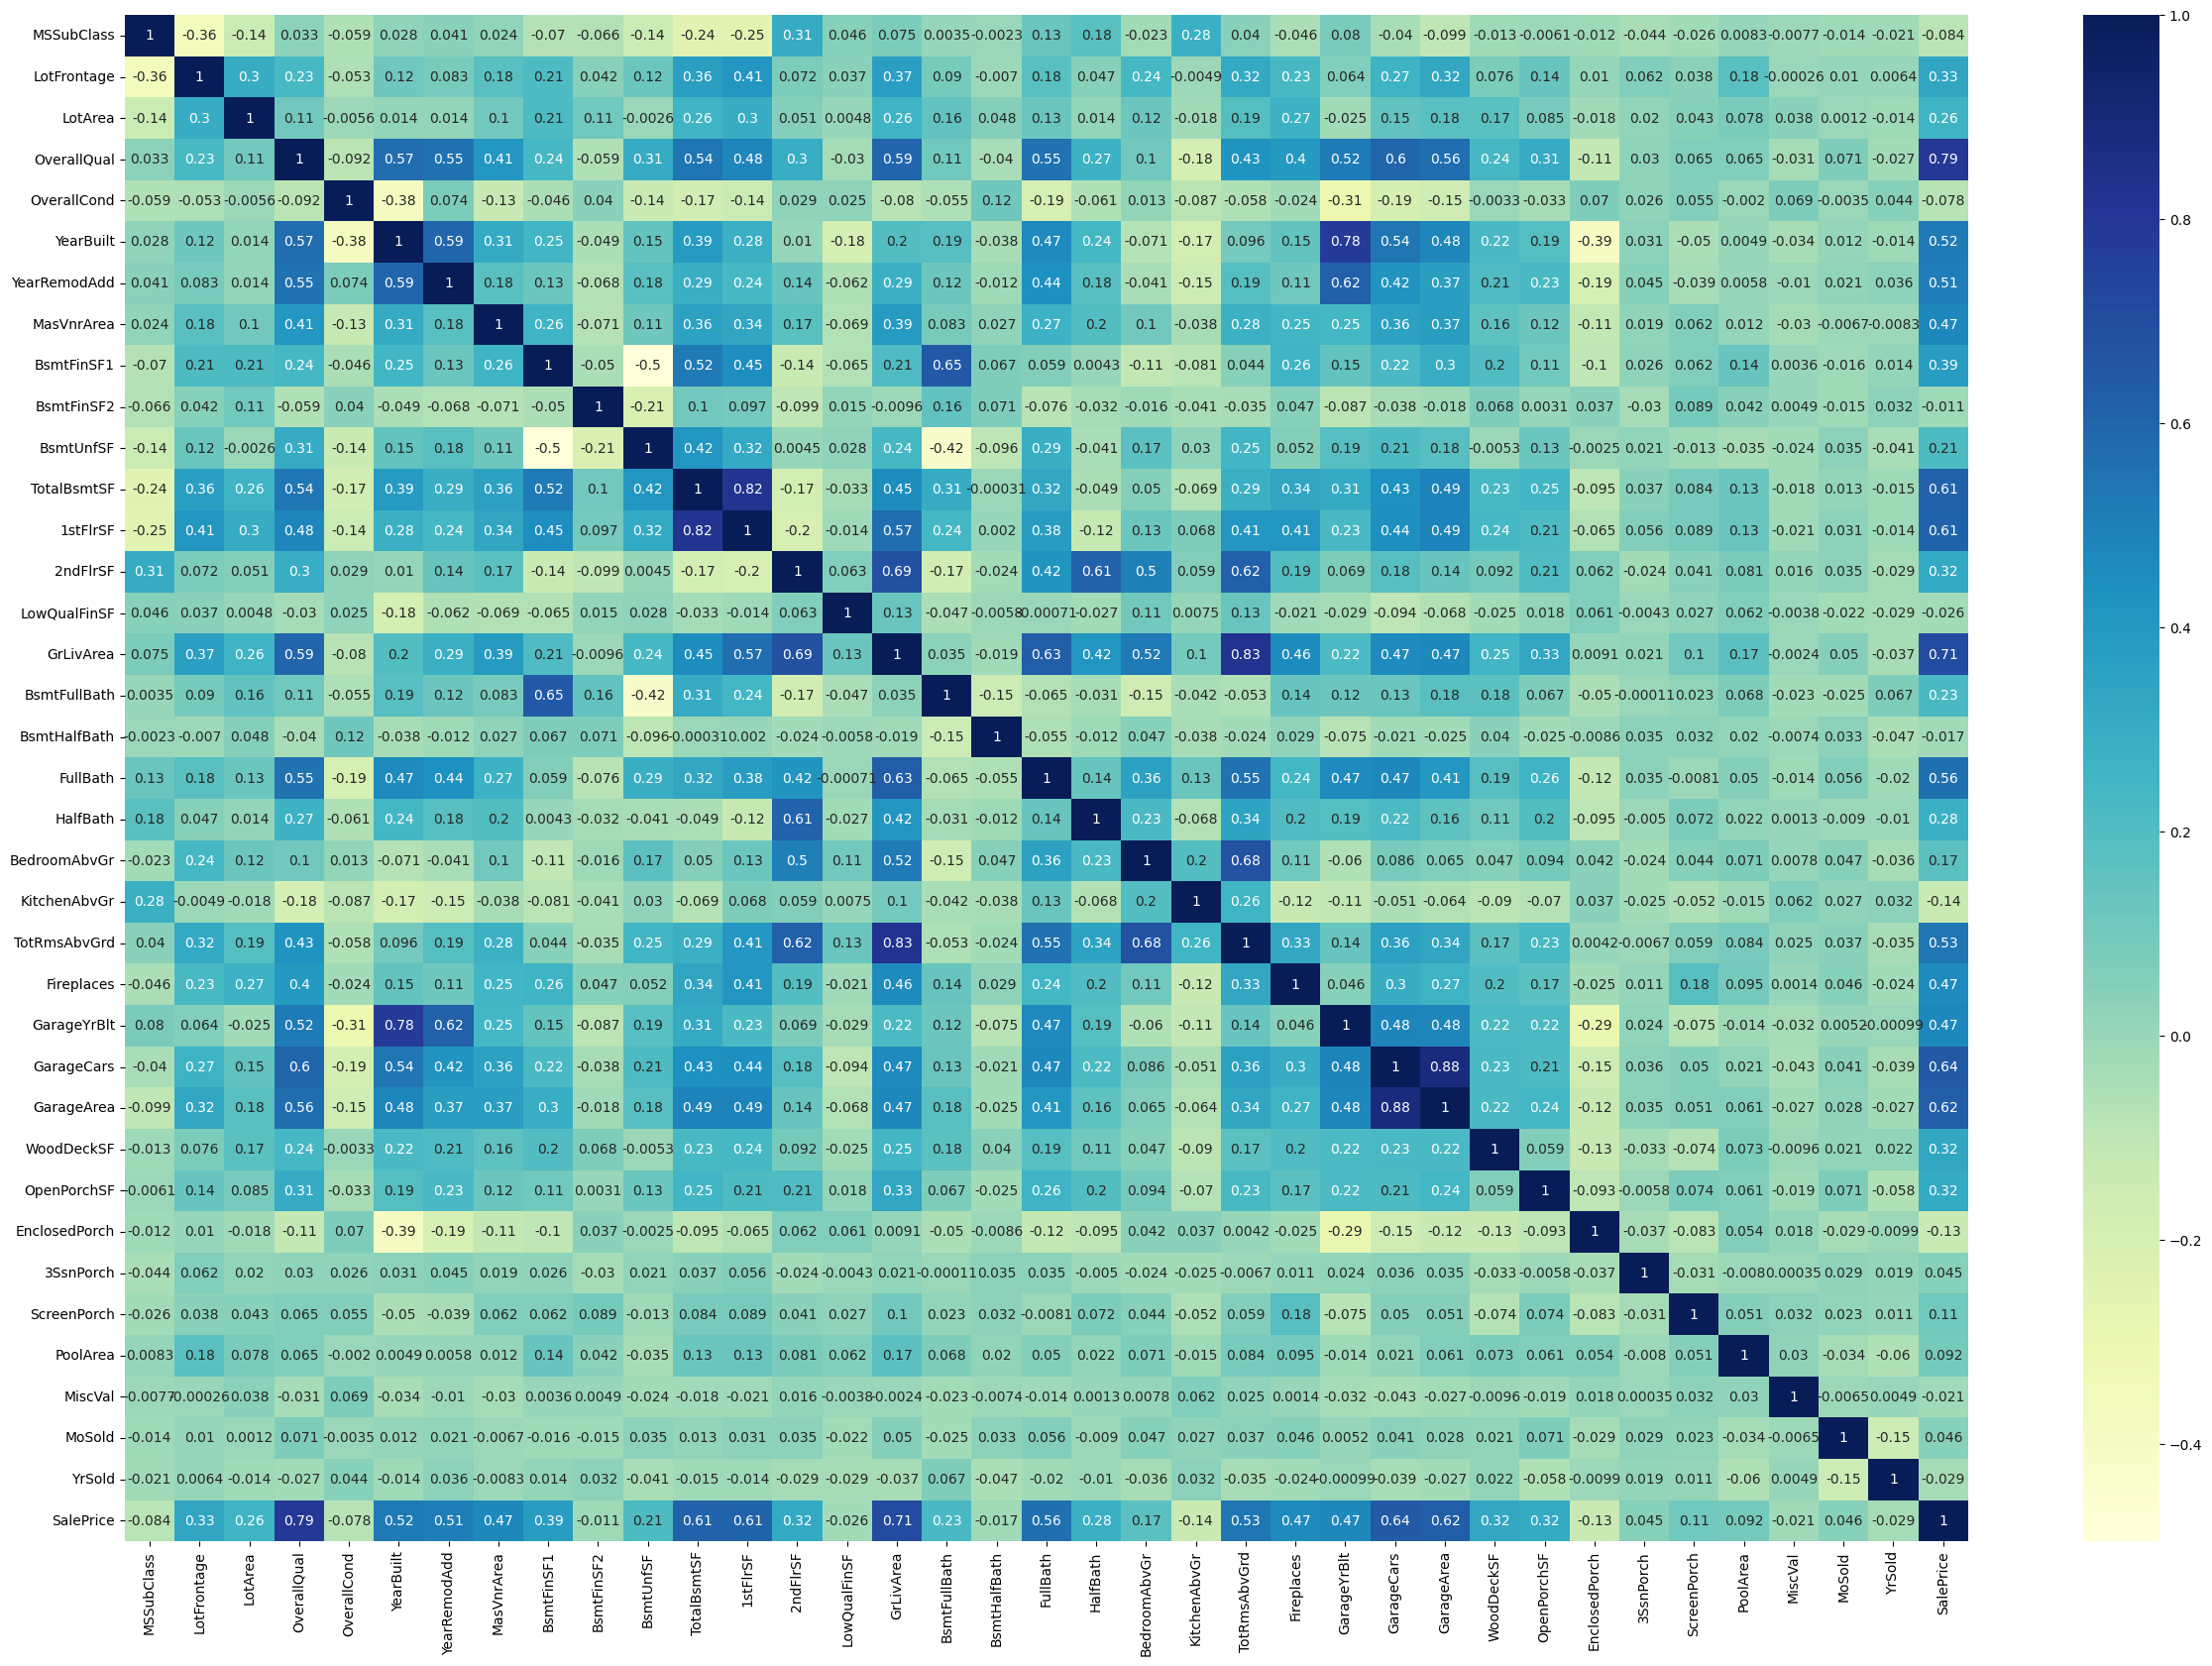

In [92]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of Saleprice with independent variables:
- Saleprice is highly (positively) correlated with ```OverallQual```, ```GrLivArea```,```GarageCars```, ```GarageArea```.

- Saleprice is negatively correlated to ```EnclosedPorch``` and ```KitchenAbvGr``` (-0.14 approximately). 

Correlation among independent variables:
- Many independent variables are highly correlated like ```TotRmsAbvGrd and GrLivArea```, ```GarageCars and GarageArea```

Thus, while building the model, we'll have to pay attention to multicollinearity.

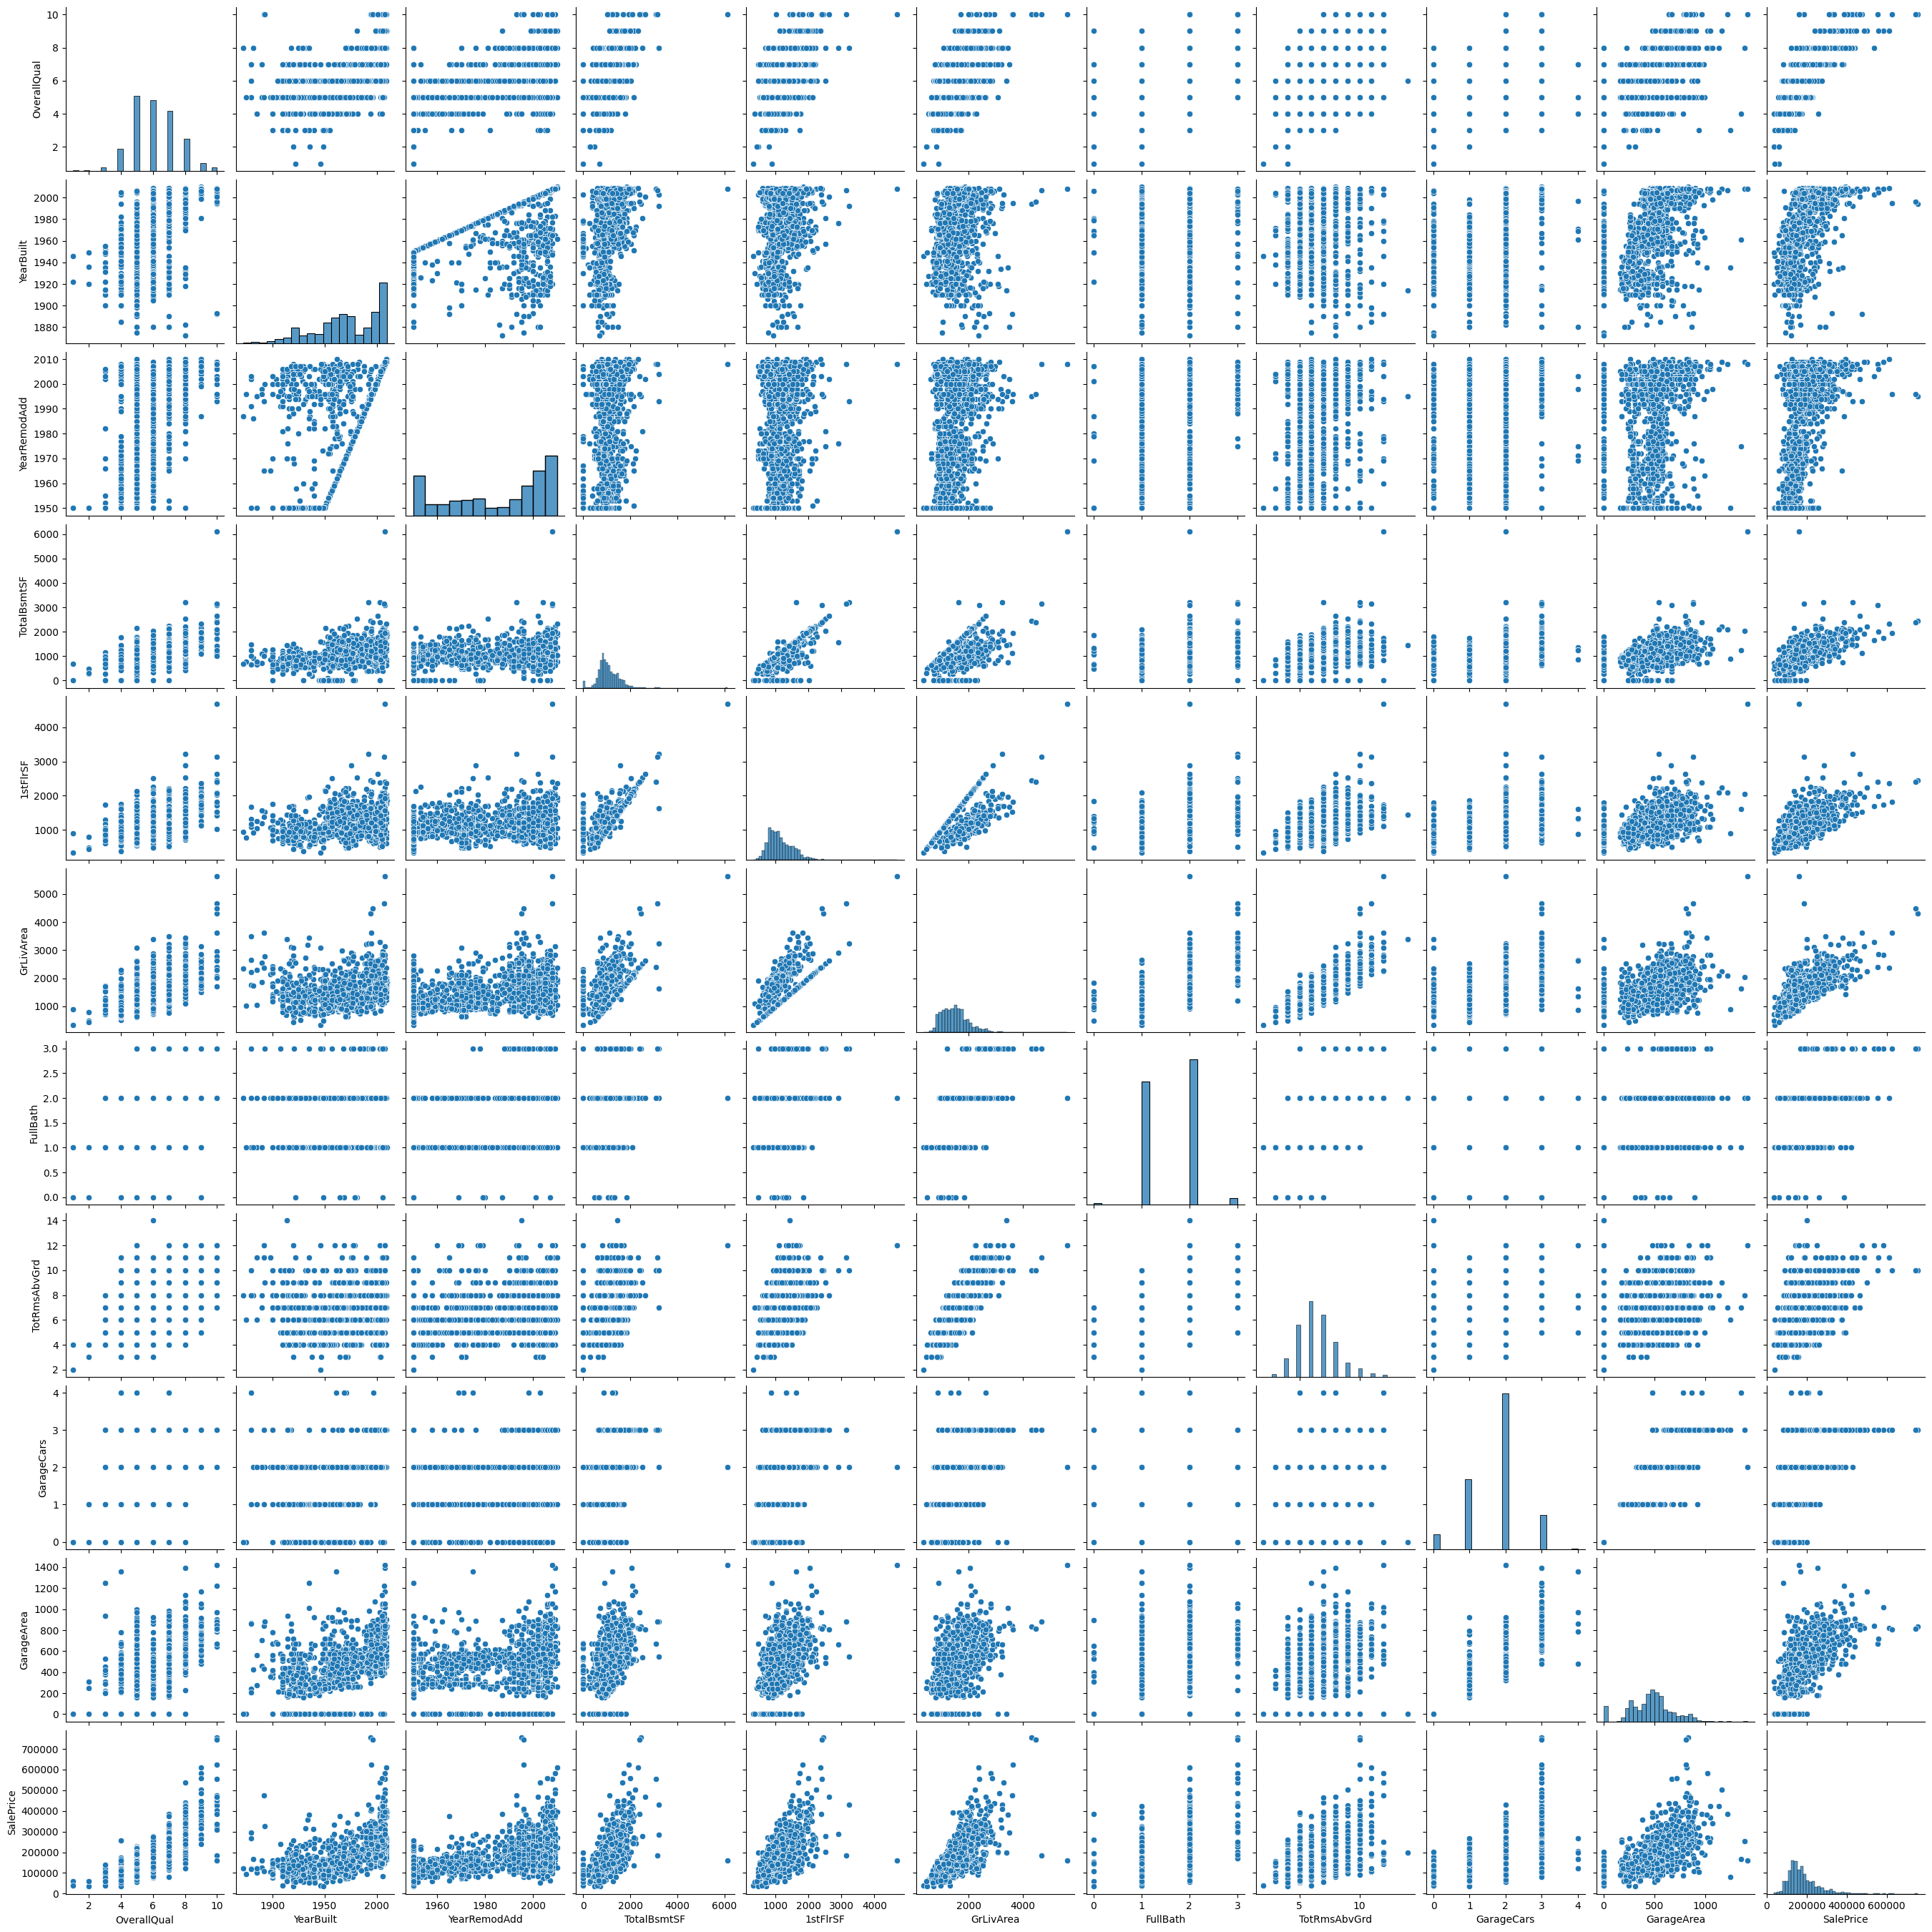

In [93]:
# Pairwise scatter plot, for few numeric variables, which are positively correlated
house_num = ['OverallQual', 'YearBuilt', 'YearRemodAdd',  
        'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd','GarageCars', 'GarageArea','SalePrice']

sns.pairplot(house[house_num],size = 2.5)
plt.show()

In [94]:
# It is observed that 'FullBath', 'TotRmsAbvGrd','GarageCars' are co-related but don't show variance clearly, so dropping them

house = house.drop(['FullBath','TotRmsAbvGrd','GarageCars'],axis=1)
house.shape


(1460, 74)

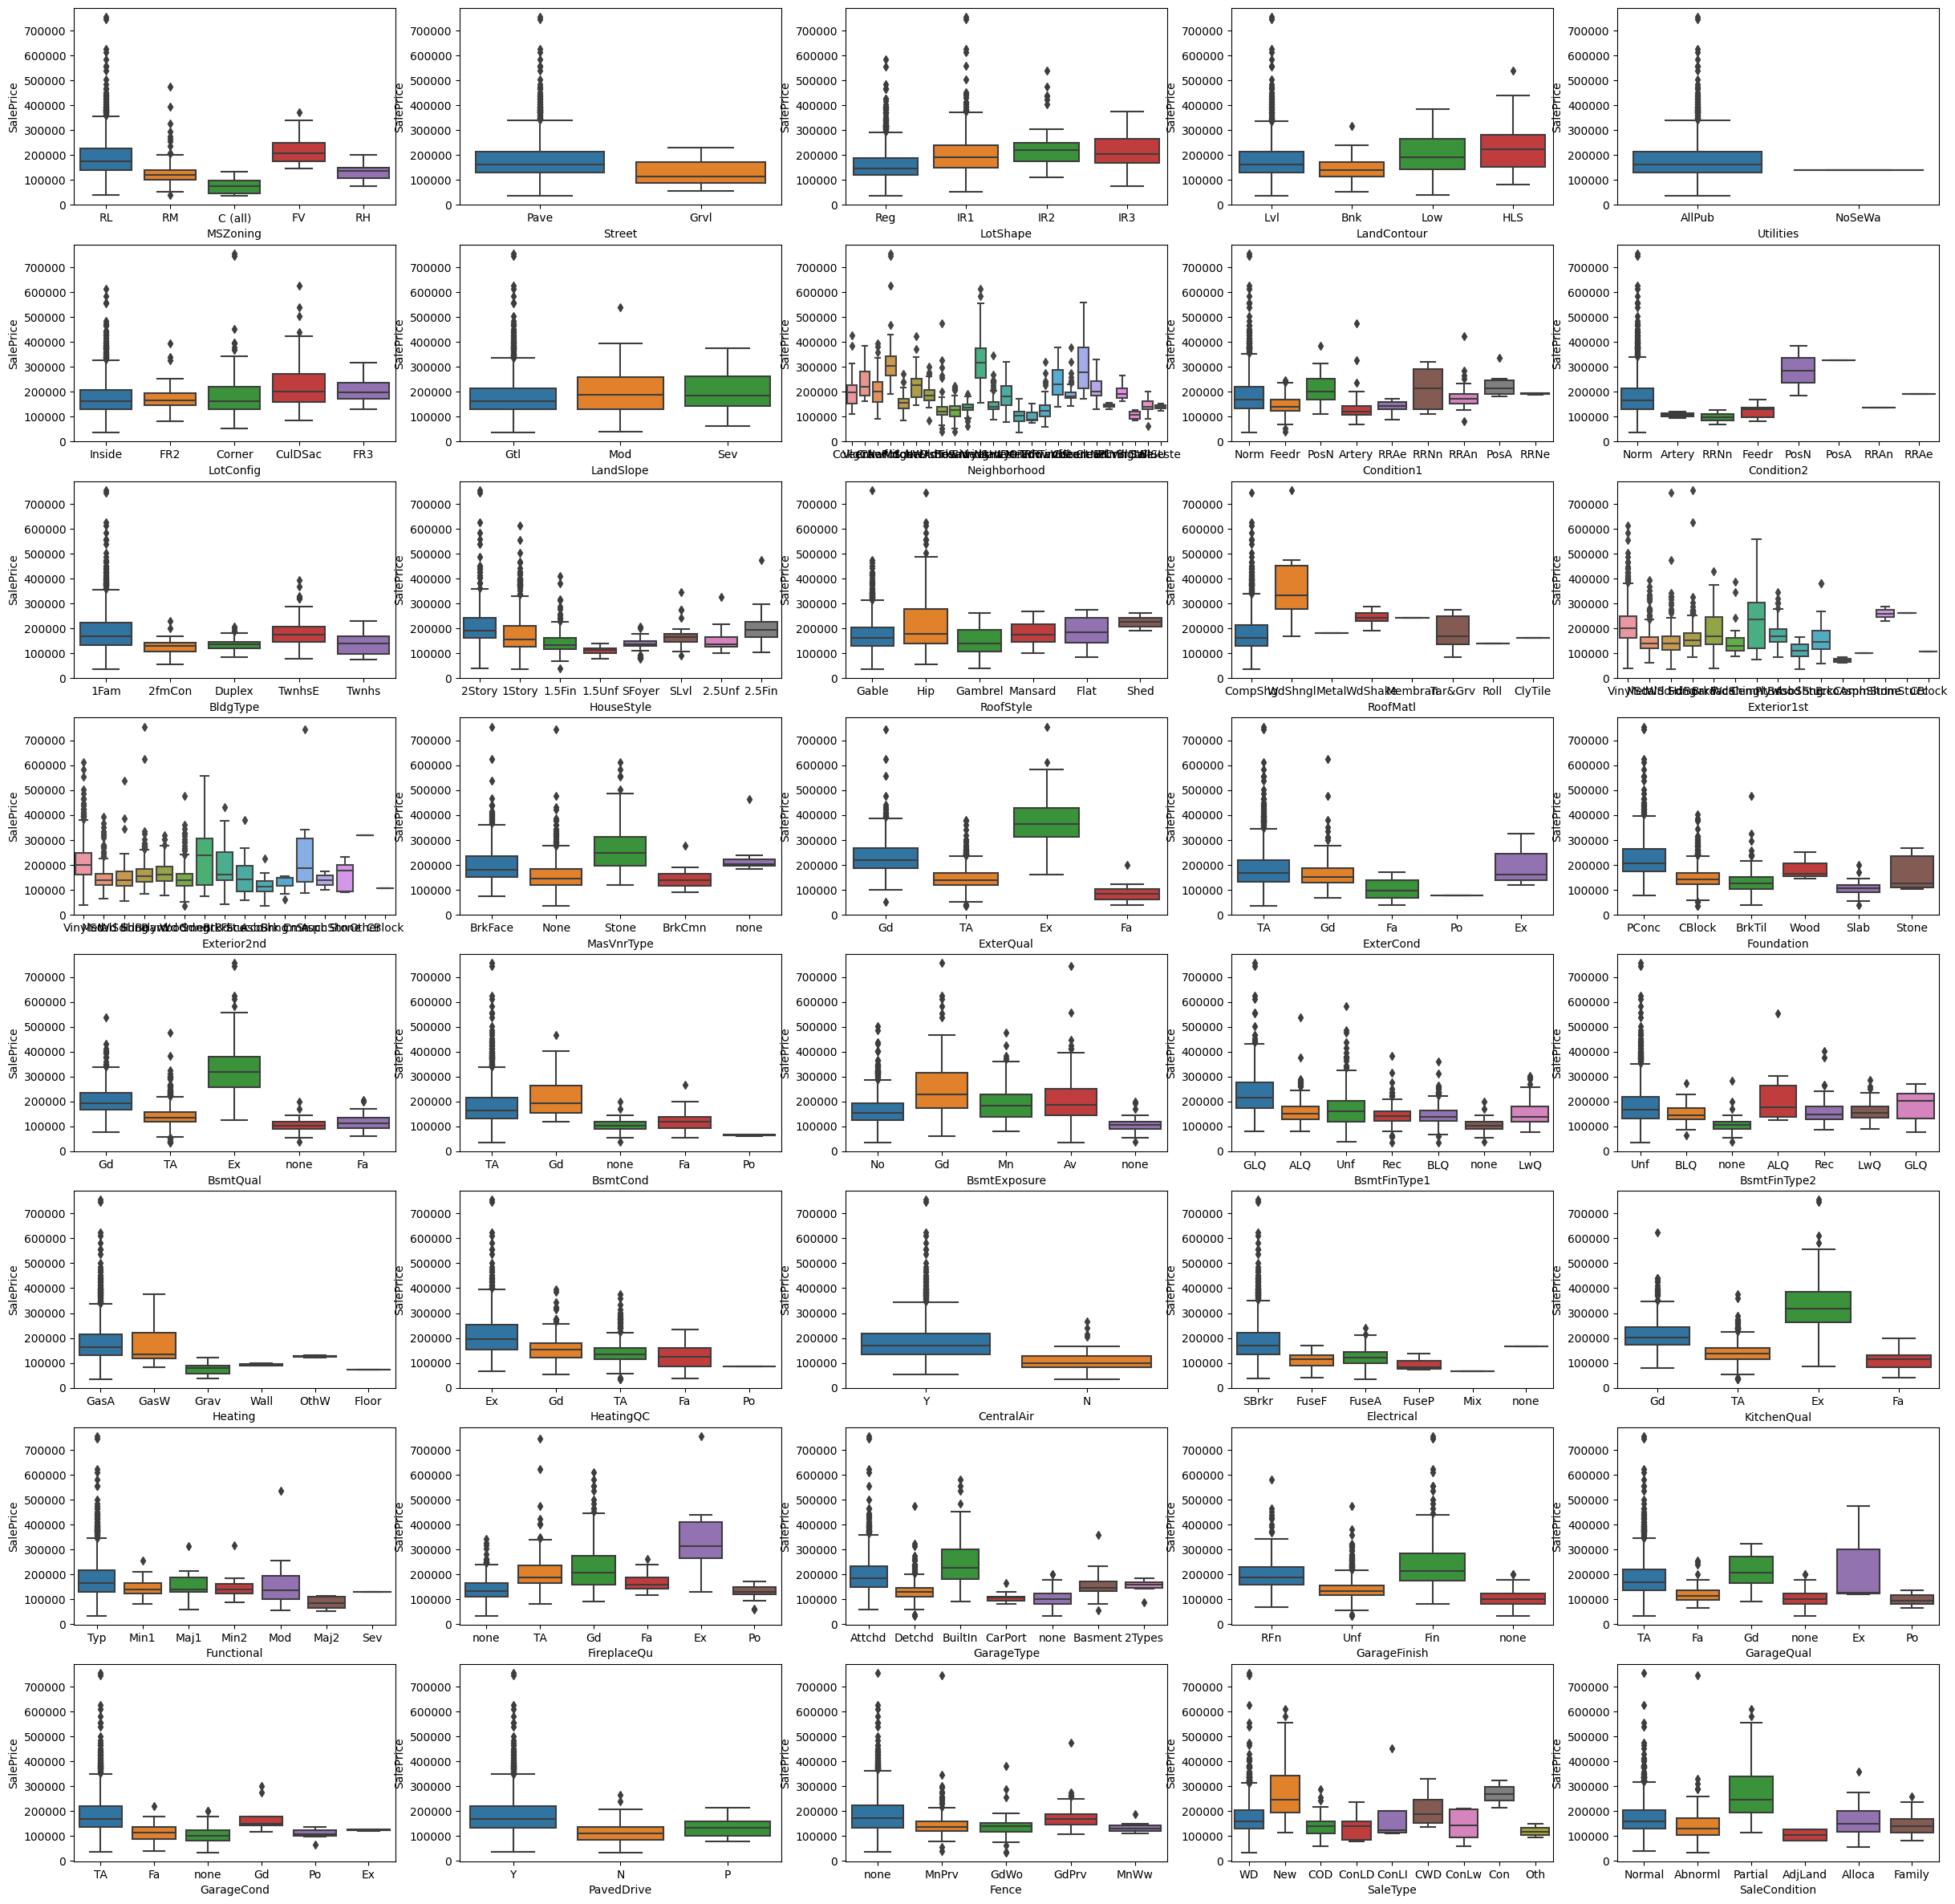

In [95]:
#Visualizing categorial variable with sales price 
plt.figure(figsize=(30, 30))
plt.subplot(8,5,1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = house)
plt.subplot(8,5,2)
sns.boxplot(x = 'Street', y = 'SalePrice', data = house)
plt.subplot(8,5,3)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = house)
plt.subplot(8,5,4)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = house)
plt.subplot(8,5,5)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = house)
plt.subplot(8,5,6)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = house)
plt.subplot(8,5,7)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = house)
plt.subplot(8,5,8)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = house)
plt.subplot(8,5,9)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = house)
plt.subplot(8,5,10)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = house)
plt.subplot(8,5,11)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = house)
plt.subplot(8,5,12)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = house)
plt.subplot(8,5,13)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = house)
plt.subplot(8,5,14)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = house)
plt.subplot(8,5,15)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = house)
plt.subplot(8,5,16)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = house)
plt.subplot(8,5,17)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = house)
plt.subplot(8,5,18)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = house)
plt.subplot(8,5,19)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = house)
plt.subplot(8,5,20)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = house)
plt.subplot(8,5,21)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = house)
plt.subplot(8,5,22)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = house)
plt.subplot(8,5,23)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = house)
plt.subplot(8,5,24)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = house)
plt.subplot(8,5,25)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = house)
plt.subplot(8,5,26)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = house)
plt.subplot(8,5,27)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = house)
plt.subplot(8,5,28)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = house)
plt.subplot(8,5,29)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = house)
plt.subplot(8,5,30)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = house)
plt.subplot(8,5,31)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = house)
plt.subplot(8,5,32)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = house)
plt.subplot(8,5,33)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = house)
plt.subplot(8,5,34)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = house)
plt.subplot(8,5,35)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = house)
plt.subplot(8,5,36)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = house)
plt.subplot(8,5,37)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = house)
plt.subplot(8,5,38)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = house)
plt.subplot(8,5,39)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = house)
plt.subplot(8,5,40)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = house)
plt.show()

Prediction from Categorial variables:
- Few Categorial variables like 'Utilities', 'Street', 'Condition2','RoofMatl','Heating','Electrical', 'Functional' are not showing much of the variance while 'Fence', 'GarageCond' after imputing null value, didn't contribute to variance. So dropping these columns.
- While 'MSZoning'(zoning classification of the sale) is impacting salesprice i.e., Floating Village Residential(FV) and Residential Low Density(RL) is having higher sales price.
- 'Neighborhood' shows significant variance
- 'Two Storey' or 'Hip' roof style or 'Excellent Height of Basement'  is having higher salesprice

In [96]:
house = house.drop(['Utilities','Street','Condition2','RoofMatl','Heating','Electrical', 'Functional','Fence','GarageCond'],axis=1)
house.shape

(1460, 65)

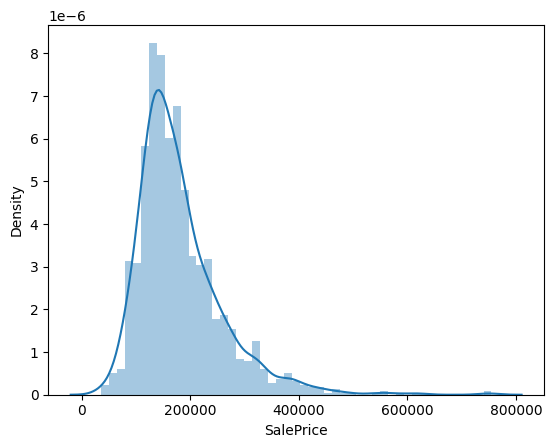

In [97]:
# target variable: sale price
sns.distplot(house['SalePrice'])
plt.show()

Since Sales price is more towards left, so we can go for transformation

For left skewed curve, log transformation works

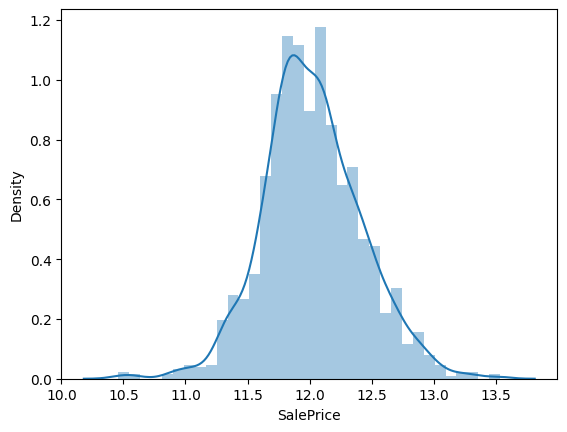

In [98]:
#x'=log(x+1) -often used for transforming skewed data
house['SalePrice']=np.log1p(house['SalePrice'])
sns.distplot(house['SalePrice'])
plt.show()

In [99]:
# Deriving age of propery from year sold and year built
# PropAge -  Property Age from yearsold - yearbuilt
house['PropAge'] = (house['YrSold'] - house['YearBuilt'])
house = house.drop(['YrSold','YearBuilt','YearRemodAdd','MoSold'],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,61,0,0,0,0,0,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,0,WD,Normal,12.109016,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,42,0,0,0,0,0,WD,Normal,12.317171,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,35,272,0,0,0,0,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,84,0,0,0,0,0,WD,Normal,12.429220,8


## 4. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [100]:
# Converting categorial variable into numeric using dummies
house = pd.get_dummies(house, drop_first=True )
house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [101]:
# split into X and y
X = house.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [102]:
y = house['SalePrice'] # response variable in Y

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [103]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [104]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])
X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])


## 5. Model Building and Evaluation

## Linear Regression

Let's now try predicting sale prices, a dataset using linear regression.

In [105]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [106]:
# Print the coefficients and intercept

lm1 = lm
print(lm1.intercept_)
print(lm1.coef_)

11.891917555227101
[-1.81003474e-02 -1.53058207e-02  2.29260465e-02  6.53465400e-02
  3.78165324e-02 -5.77388856e-03 -6.14998965e-03  5.22650785e-03
  2.20104128e-05 -4.28279275e-03  4.11433757e-02  5.18695312e-02
  2.62010118e-03  7.34572515e-02  2.55264508e-02  3.67726139e-03
  8.96292964e-03  2.49280367e-02 -4.36954706e-03 -8.28944453e-03
 -1.59956325e-04  3.66969700e-02  1.30374287e-02 -2.34783807e-03
  8.05178205e-03  1.02873541e-02  9.76267935e-03 -1.23886369e-02
 -2.48782516e-06 -3.15736807e-02  4.08548319e-01  4.24745436e-01
  4.14085923e-01  3.88007663e-01  3.35824970e-02 -4.26165384e-02
  1.39294324e-02  8.46323246e-02  1.05594825e-01  9.91057557e-02
  3.34010324e-02 -5.43579335e-02 -6.74939601e-02 -1.11715030e-02
  2.95334191e-02 -8.91924005e-02 -3.00030653e-02 -6.50936480e-02
  2.10285029e-02  1.03135422e-01  2.34773591e-02  1.80132794e-01
 -8.71626878e-02  4.07900030e-02 -4.11661225e-02 -1.78102202e-01
 -1.75789678e-02 -1.24881619e-03 -8.25717989e-03  1.91548234e-02
  1.23

In [107]:
from sklearn.metrics import r2_score, mean_squared_error

In [108]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lm = r2_score(y_train, y_pred_train)
print(r2_train_lm)
metric.append(r2_train_lm)

r2_test_lm = r2_score(y_test, y_pred_test)
print(r2_test_lm)
metric.append(r2_test_lm)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)


0.9248226092064619
0.8745868706706617
12.065233242508175
9.03822422665963
0.01181707467434689
0.020635215129359886


In [109]:
#let's try with RFE with top 20 feature

lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 101),
 ('LotFrontage', False, 131),
 ('LotArea', False, 118),
 ('OverallQual', True, 1),
 ('OverallCond', False, 54),
 ('MasVnrArea', False, 164),
 ('BsmtFinSF1', False, 107),
 ('BsmtFinSF2', False, 177),
 ('BsmtUnfSF', False, 182),
 ('TotalBsmtSF', False, 166),
 ('1stFlrSF', False, 8),
 ('2ndFlrSF', False, 12),
 ('LowQualFinSF', False, 37),
 ('GrLivArea', False, 28),
 ('BsmtFullBath', False, 97),
 ('BsmtHalfBath', False, 170),
 ('HalfBath', False, 151),
 ('BedroomAbvGr', False, 92),
 ('KitchenAbvGr', False, 169),
 ('Fireplaces', False, 156),
 ('GarageYrBlt', False, 181),
 ('GarageArea', False, 66),
 ('WoodDeckSF', False, 138),
 ('OpenPorchSF', False, 174),
 ('EnclosedPorch', False, 154),
 ('3SsnPorch', False, 144),
 ('ScreenPorch', False, 142),
 ('PoolArea', False, 136),
 ('MiscVal', False, 184),
 ('PropAge', False, 53),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 86),
 ('Lo

In [110]:
Linear_var = X_train.columns[rfe.support_]
print(Linear_var)

Index(['OverallQual', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_Somerst', 'BldgType_Twnhs',
       'Exterior1st_BrkComm', 'ExterCond_Fa', 'Foundation_Stone',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_none',
       'BsmtFinType1_none', 'CentralAir_Y', 'SaleType_ConLD'],
      dtype='object')


In [111]:
X_train_rfe = X_train[Linear_var]
X_test_rfe = X_test[Linear_var]
print('X_train_rfe',X_train_rfe.shape)
print('X_test_rfe',X_test_rfe.shape)

X_train_rfe (1021, 20)
X_test_rfe (438, 20)


In [112]:
lm.fit(X_train_rfe, y_train)
print(lm.intercept_)
print(lm.coef_)


11.664123271834617
[ 0.22170077  0.33071165  0.39361355  0.45058338  0.28058128  0.22741409
  0.17503743  0.26576103  0.10355933 -0.16956777 -0.30963252 -0.17099799
  0.30225028 -0.30256817 -0.19201257 -0.28741094 -0.16675889 -0.16675889
  0.16109698  0.27488269]


In [113]:
y_pred_train_rfe = lm.predict(X_train_rfe)
y_pred_test_rfe = lm.predict(X_test_rfe)

metric_rfe = []
r2_train_lm_rfe = r2_score(y_train, y_pred_train_rfe)
print(r2_train_lm_rfe)
metric_rfe.append(r2_train_lm_rfe)

r2_test_lm_rfe = r2_score(y_test, y_pred_test_rfe)
print(r2_test_lm_rfe)
metric_rfe.append(r2_test_lm_rfe)

rss1_lr_rfe = np.sum(np.square(y_train - y_pred_train_rfe))
print(rss1_lr_rfe)
metric_rfe.append(rss1_lr_rfe)

rss2_lr_rfe = np.sum(np.square(y_test - y_pred_test_rfe))
print(rss2_lr_rfe)
metric_rfe.append(rss2_lr_rfe)

mse_train_lr_rfe = mean_squared_error(y_train, y_pred_train_rfe)
print(mse_train_lr_rfe)
metric_rfe.append(mse_train_lr_rfe**0.5)

mse_test_lr_rfe = mean_squared_error(y_test, y_pred_test_rfe)
print(mse_test_lr_rfe)
metric_rfe.append(mse_test_lr_rfe**0.5)

0.7778233786699443
0.7580569574193528
35.65716672372127
17.436256320354786
0.0349237676040365
0.039808804384371656


With the use of RFE , R2 is improved both in training dataset as well as in test data set

## Lasso and Ridge Regression

Let's now try predicting sale prices, with lasso and ridge regression.

## Lasso Regression

In [114]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1021, 205)
y_train (1021,)


In [115]:

# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [117]:
#Let's try with alpha = 0.01     
alpha_lasso = 0.01
lasso = Lasso(alpha=alpha_lasso)

lasso.fit(X_train, y_train)
lasso.coef_

array([-2.07787100e-02,  0.00000000e+00,  1.07699292e-02,  1.30908136e-01,
        4.11360510e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.43343564e-06,  1.89533227e-02,  5.35738923e-03,  0.00000000e+00,
       -0.00000000e+00,  1.17186921e-01,  3.16135348e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  3.52298333e-02,
        1.08486965e-03,  4.11763557e-02,  1.23092951e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.17229417e-03, -1.73276608e-02,
       -3.04802579e-06, -7.98552384e-02,  0.00000000e+00,  0.00000000e+00,
        4.29674256e-03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -

In [118]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lo_metric = []
r2_train_lo = r2_score(y_train, y_pred_train)
print(r2_train_lo)
lo_metric.append(r2_train_lo)

r2_test_lo = r2_score(y_test, y_pred_test)
print(r2_test_lo)
lo_metric.append(r2_test_lo)

rss1_lo = np.sum(np.square(y_train - y_pred_train))
print(rss1_lo)
lo_metric.append(rss1_lo)

rss2_lo = np.sum(np.square(y_test - y_pred_test))
print(rss2_lo)
lo_metric.append(rss2_lo)

mse_train_lo = mean_squared_error(y_train, y_pred_train)
print(mse_train_lo)
lo_metric.append(mse_train_lo**0.5)

mse_test_lo = mean_squared_error(y_test, y_pred_test)
print(mse_test_lo)
lo_metric.append(mse_test_lo**0.5)

0.852058241459103
0.8552321160109424
23.743199973577322
10.433075095958564
0.023254848162171715
0.02381980615515654


In [119]:
Lo1 = pd.DataFrame(X.columns)
Lo1['Coefficient'] = lasso.coef_
Lo1.columns = ['Feature', 'Coefficient']
pd.set_option('display.max_rows', None)
Lo1.sort_values(by='Coefficient',ascending=False)

,Feature,Coefficient
3,OverallQual,0.130908
13,GrLivArea,0.117187
21,GarageArea,0.041176
4,OverallCond,0.041136
19,Fireplaces,0.035230
14,BsmtFullBath,0.031614
9,TotalBsmtSF,0.018953
22,WoodDeckSF,0.012309
2,LotArea,0.010770
176,GarageType_Attchd,0.009168


In [120]:
Lo_pred = pd.DataFrame(Lo1[(Lo1['Coefficient'] != 0)])
Lo_pred.head

<bound method NDFrame.head of                Feature  Coefficient
0           MSSubClass    -0.020779
2              LotArea     0.010770
3          OverallQual     0.130908
4          OverallCond     0.041136
8            BsmtUnfSF     0.000001
9          TotalBsmtSF     0.018953
10            1stFlrSF     0.005357
13           GrLivArea     0.117187
14        BsmtFullBath     0.031614
19          Fireplaces     0.035230
20         GarageYrBlt     0.001085
21          GarageArea     0.041176
22          WoodDeckSF     0.012309
26         ScreenPorch     0.004172
27            PoolArea    -0.017328
28             MiscVal    -0.000003
29             PropAge    -0.079855
32         MSZoning_RL     0.004297
176  GarageType_Attchd     0.009168>

In [121]:
Lo_pred.shape

(19, 2)

In [122]:
Lasso_var = list(Lo_pred['Feature'])
print(Lasso_var)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'MiscVal', 'PropAge', 'MSZoning_RL', 'GarageType_Attchd']


## Ridge Regression

In [123]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [124]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [125]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
alpha_ridge = alpha
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.intercept_)
print(ridge.coef_)

11.860084840450513
[-2.31698467e-02 -1.15316918e-02  1.91094640e-02  8.43450007e-02
  4.60540099e-02 -3.17476374e-03 -2.71219144e-03  9.15256917e-03
  2.13056664e-05  6.59329391e-04  3.97445639e-02  5.27310637e-02
  2.29028768e-03  7.30858079e-02  2.96108594e-02  3.32112789e-03
  9.02231178e-03  2.22886237e-02 -5.15510574e-03  1.62057054e-03
 -2.98317008e-05  3.59448979e-02  1.27501084e-02 -2.60015159e-03
  8.61983853e-03  9.15296277e-03  9.84724230e-03 -1.65786585e-02
 -3.42969185e-06 -4.90885664e-02  5.13195795e-02  3.96069035e-02
  6.44310698e-02  1.51539002e-02  2.65811699e-02 -3.67349745e-02
  6.57319499e-03  4.01498416e-02  3.81288740e-02  5.51315269e-02
  3.43550104e-02 -2.86650355e-02 -7.97599005e-03 -7.58437082e-03
  2.98062077e-02 -1.77257850e-02 -2.76984195e-03 -2.99000495e-02
  9.14441538e-03  4.81853174e-02 -2.22138344e-02  1.05270550e-01
 -8.84260009e-02 -1.28891377e-02 -7.44240092e-02 -5.68031853e-02
 -2.82165277e-02 -2.14427869e-02 -8.10604494e-04 -6.56029972e-03
  4.10

In [126]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_rd = []
r2_train_rd = r2_score(y_train, y_pred_train)
print(r2_train_rd)
metric_rd.append(r2_train_rd)

r2_test_rd = r2_score(y_test, y_pred_test)
print(r2_test_rd)
metric_rd.append(r2_test_rd)

rss1_rd = np.sum(np.square(y_train - y_pred_train))
print(rss1_rd)
metric_rd.append(rss1_rd)

rss2_rd = np.sum(np.square(y_test - y_pred_test))
print(rss2_rd)
metric_rd.append(rss2_rd)

mse_train_rd = mean_squared_error(y_train, y_pred_train)
print(mse_train_rd)
metric_rd.append(mse_train_rd**0.5)

mse_test_rd = mean_squared_error(y_test, y_pred_test)
print(mse_test_rd)
metric_rd.append(mse_test_rd**0.5)

0.913531326556811
0.8829360576718619
13.877373266751103
8.436518291796979
0.013591942474780709
0.019261457287207715


In [127]:
model_rd_parameters = list(ridge.coef_)
cols = X.columns
mod_ridge = list(zip(cols, model_rd_parameters))
mod_ridge_final = pd.DataFrame(mod_ridge)
mod_ridge_final.columns = ['Feature', 'Coefficient']
modrd=mod_ridge_final.sort_values(by=['Coefficient'], ascending = False)
modrd.head(20)

,Feature,Coefficient
51,Neighborhood_Crawfor,0.105271
61,Neighborhood_NridgHt,0.091273
3,OverallQual,0.084345
66,Neighborhood_Somerst,0.073238
13,GrLivArea,0.073086
71,Condition1_Norm,0.065746
32,MSZoning_RL,0.064431
194,SaleType_ConLD,0.064095
96,Exterior1st_BrkFace,0.063607
67,Neighborhood_StoneBr,0.057516


In [128]:
ridge_var = list(modrd.Feature.head(20))
print(ridge_var)

['Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'OverallQual', 'Neighborhood_Somerst', 'GrLivArea', 'Condition1_Norm', 'MSZoning_RL', 'SaleType_ConLD', 'Exterior1st_BrkFace', 'Neighborhood_StoneBr', 'LandContour_Lvl', '2ndFlrSF', 'BsmtExposure_Gd', 'MSZoning_FV', 'CentralAir_Y', 'Neighborhood_ClearCr', 'SaleCondition_Normal', 'OverallCond', 'Foundation_PConc', 'Neighborhood_NoRidge']


In [129]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }
        
label_metric = pd.Series(['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],name = 'Metric')
lr_metric = pd.Series(metric_rfe ,name = 'Linear Regression' )
rg_metric = pd.Series(metric_rd, name = 'Ridge Regression')
ls_metric = pd.Series(lo_metric, name = 'Lasso Regression')

final_metric = pd.concat([label_metric,lr_metric,rg_metric, ls_metric], axis = 1)

final_metric.head(6)


,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.777823,0.913531,0.852058
1,R2 Score (Test),0.758057,0.882936,0.855232
2,RSS (Train),35.657167,13.877373,23.743200
3,RSS (Test),17.436256,8.436518,10.433075
4,MSE (Train),0.186879,0.116584,0.152495
5,MSE (Test),0.199521,0.138786,0.154337


## Lets observe the changes in the coefficients after regularization

In [130]:
betas = pd.DataFrame(index=X.columns)

In [131]:
betas.rows = X.columns

In [132]:
betas['Linear'] = lm1.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [133]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,-0.018100,-0.023170,-0.020779
LotFrontage,-0.015306,-0.011532,0.000000
LotArea,0.022926,0.019109,0.010770
OverallQual,0.065347,0.084345,0.130908
OverallCond,0.037817,0.046054,0.041136
MasVnrArea,-0.005774,-0.003175,0.000000
BsmtFinSF1,-0.006150,-0.002712,0.000000
BsmtFinSF2,0.005227,0.009153,0.000000
BsmtUnfSF,0.000022,0.000021,0.000001
TotalBsmtSF,-0.004283,0.000659,0.018953


In [134]:
# Top predictors from RFE, Lasso and Ridge
#though in Lasso, negative correlated features are also present like Propage
print("1. Top 20 positively correlated Predictor from RFE", list(Linear_var))
print("2. Top 20 Predictor from Lasso", Lasso_var)
print("3. Top 20 positively correlated Predictor from Ridge", ridge_var)

1. Top 20 positively correlated Predictor from RFE ['OverallQual', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_Somerst', 'BldgType_Twnhs', 'Exterior1st_BrkComm', 'ExterCond_Fa', 'Foundation_Stone', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_none', 'BsmtFinType1_none', 'CentralAir_Y', 'SaleType_ConLD']
2. Top 20 Predictor from Lasso ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'MiscVal', 'PropAge', 'MSZoning_RL', 'GarageType_Attchd']
3. Top 20 positively correlated Predictor from Ridge ['Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'OverallQual', 'Neighborhood_Somerst', 'GrLivArea', 'Condition1_Norm', 'MSZoning_RL', 'SaleType_ConLD', 'Exterior1st_BrkFace', 'Neighborhood_StoneBr', 'LandContour_Lvl', '2ndFlrSF', '

In [135]:
#lambda value for Lasso and Ridge
print("lambda in Lasso" , alpha_lasso)
print("lambda in Ridge" , alpha_ridge)

lambda in Lasso 0.01
lambda in Ridge 10


### 6. Observation 
### It is observed that R2 is better with Lasso for both train and test dataset. Train and test scores are also matching. 
Features which can be used for prediction are : - 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'MiscVal', 'PropAge', 'MSZoning_RL', 'GarageType_Attchd'

In [136]:
Lo_pred.sort_values(by='Coefficient',ascending=True)

,Feature,Coefficient
29,PropAge,-0.079855
0,MSSubClass,-0.020779
27,PoolArea,-0.017328
28,MiscVal,-0.000003
8,BsmtUnfSF,0.000001
20,GarageYrBlt,0.001085
26,ScreenPorch,0.004172
32,MSZoning_RL,0.004297
10,1stFlrSF,0.005357
176,GarageType_Attchd,0.009168


### Below are some of the features, which are having negative correlation with salesprice, i.e., decrease in their values can lead to increase in sales price:-
##### 1. PropAge - Age of property
##### 2. MSSubClass - Type of dwelling involved in the sale
### While few below features are having positive correlation with salesprice, i.e., increase in their values can lead to increase in sales price:-
##### 1. OverallQual - Rates the overall material and finish of the house
##### 2. GrLivArea - Above grade (ground) living area square feet
##### 3. GarageArea	 - Size of garage in square feet
##### 4. OverallCond - Rates the overall condition of the house